<a href="https://colab.research.google.com/github/rsj0113/SNA/blob/main/Cocktail_Recipes_Network_Link_Prediction_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://www.analyticsvidhya.com/blog/2020/01/link-prediction-how-to-predict-your-future-connections-on-facebook/

In [ ]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('./cocktail_final3_net_weight.csv')

In [ ]:
G = nx.from_pandas_edgelist(df, "Source", "Target", create_using=nx.Graph())

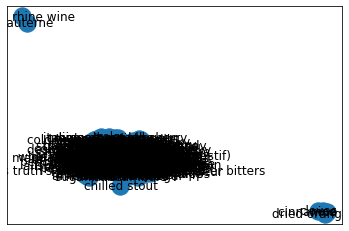

In [ ]:
nx.draw_networkx(G)

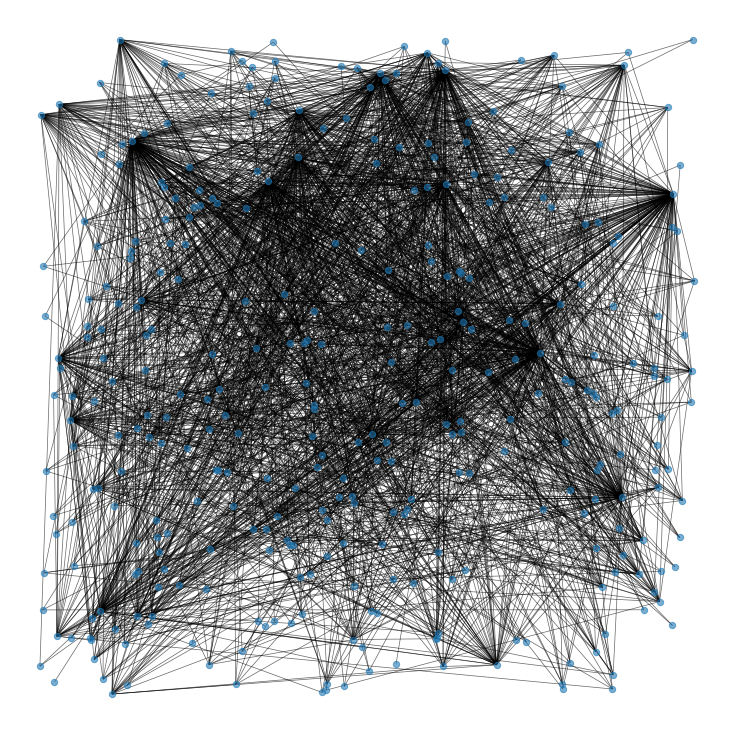

In [ ]:
plt.figure(figsize=(10,10))

pos = nx.random_layout(G, seed=23)
nx.draw(G, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)

plt.show()

In [ ]:
df_dropdup = df[['Source','Target']].drop_duplicates()

In [ ]:
df_dropdup

,Source,Target
0,rum,grapefruit twist
1,rum,mango nectar
2,rum,orgeat syrup
3,rum,light cream
4,rum,powdered sugar
...,...,...
2322,egg white,general sugar
2323,egg white,cinnamon sugar
2324,egg yolk,powdered sugar
2325,egg yolk,general sugar


In [ ]:
adj_G = nx.to_numpy_matrix(G, nodelist = df['Source'].drop_duplicates())

In [ ]:
adj_G.shape

(288, 288)

In [ ]:
adj_G

matrix([[0., 1., 1., ..., 1., 1., 0.],
        [1., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tqdm(range(adj_G.shape[0]))

  0%|          | 0/288 [00:00<?, ?it/s]

  0%|          | 0/288 [00:00<?, ?it/s]

In [ ]:
range(adj_G.shape[0])

range(0, 288)

In [ ]:
range(adj_G.shape[1])

range(0, 288)

In [ ]:
nx.shortest_path_length(G, df['Source'].drop_duplicates().iloc[15], df['Source'].drop_duplicates().iloc[3])

2

In [ ]:
# get unconnected node-pairs
all_unconnected_pairs = []
all_unconnected_pairs2 = []

# traverse adjacency matrix
offset = 0
for i in tqdm(range(adj_G.shape[0])):
  for j in range(offset,adj_G.shape[1]):
    if i != j:
      try:
        t = nx.shortest_path_length(G, df['Source'].drop_duplicates().iloc[i], df['Source'].drop_duplicates().iloc[j])
        if nx.shortest_path_length(G, df['Source'].drop_duplicates().iloc[i], df['Source'].drop_duplicates().iloc[j]) <=2:
          if adj_G[i,j] == 0:
            all_unconnected_pairs.append([df['Source'].drop_duplicates().iloc[i], df['Source'].drop_duplicates().iloc[j]])
      except: 
        print([df['Source'].drop_duplicates().iloc[i], df['Source'].drop_duplicates().iloc[j]])
        all_unconnected_pairs2.append([df['Source'].drop_duplicates().iloc[i], df['Source'].drop_duplicates().iloc[j]])


  0%|          | 0/288 [00:00<?, ?it/s]

['rum', 'wine']
['rum', 'dried orange peel']
['rum', 'cinnamon sticks']
['rum', 'chilled rhine wine']



  0%|          | 1/288 [00:00<03:39,  1.30it/s]

['sweet vermouth', 'wine']
['sweet vermouth', 'dried orange peel']
['sweet vermouth', 'cinnamon sticks']
['sweet vermouth', 'chilled rhine wine']



  1%|          | 2/288 [00:01<03:51,  1.24it/s]

['orange curacao', 'wine']
['orange curacao', 'dried orange peel']
['orange curacao', 'cinnamon sticks']
['orange curacao', 'chilled rhine wine']



  1%|          | 3/288 [00:02<03:55,  1.21it/s]

['sour mix', 'wine']
['sour mix', 'dried orange peel']
['sour mix', 'cinnamon sticks']
['sour mix', 'chilled rhine wine']



  1%|▏         | 4/288 [00:03<03:48,  1.24it/s]

['whiskey', 'wine']
['whiskey', 'dried orange peel']
['whiskey', 'cinnamon sticks']
['whiskey', 'chilled rhine wine']



  2%|▏         | 5/288 [00:04<03:44,  1.26it/s]

['soda water', 'wine']
['soda water', 'dried orange peel']
['soda water', 'cinnamon sticks']
['soda water', 'chilled rhine wine']



  2%|▏         | 6/288 [00:04<03:46,  1.25it/s]

['maraschino cherry', 'wine']
['maraschino cherry', 'dried orange peel']
['maraschino cherry', 'cinnamon sticks']
['maraschino cherry', 'chilled rhine wine']



  2%|▏         | 7/288 [00:05<03:45,  1.25it/s]

['cherry-flavored brandy', 'wine']
['cherry-flavored brandy', 'dried orange peel']
['cherry-flavored brandy', 'cinnamon sticks']
['cherry-flavored brandy', 'chilled rhine wine']



  3%|▎         | 8/288 [00:06<03:44,  1.25it/s]

['triple sec', 'wine']
['triple sec', 'dried orange peel']
['triple sec', 'cinnamon sticks']
['triple sec', 'chilled rhine wine']



  3%|▎         | 9/288 [00:07<03:37,  1.28it/s]

['maraschino', 'wine']
['maraschino', 'dried orange peel']
['maraschino', 'cinnamon sticks']
['maraschino', 'chilled rhine wine']



  3%|▎         | 10/288 [00:07<03:36,  1.28it/s]

['tawny port', 'wine']
['tawny port', 'dried orange peel']
['tawny port', 'cinnamon sticks']
['tawny port', 'chilled rhine wine']



  4%|▍         | 11/288 [00:08<03:33,  1.30it/s]

['agave nectar', 'wine']
['agave nectar', 'dried orange peel']
['agave nectar', 'cinnamon sticks']
['agave nectar', 'chilled rhine wine']



  4%|▍         | 12/288 [00:09<03:34,  1.28it/s]

['bacardi rum', 'wine']
['bacardi rum', 'dried orange peel']
['bacardi rum', 'cinnamon sticks']
['bacardi rum', 'chilled rhine wine']



  5%|▍         | 13/288 [00:10<03:27,  1.32it/s]

['grenadine', 'wine']
['grenadine', 'dried orange peel']
['grenadine', 'cinnamon sticks']
['grenadine', 'chilled rhine wine']



  5%|▍         | 14/288 [00:11<03:29,  1.31it/s]

['brandy', 'wine']
['brandy', 'dried orange peel']
['brandy', 'cinnamon sticks']
['brandy', 'chilled rhine wine']



  5%|▌         | 15/288 [00:11<03:30,  1.30it/s]

['gin', 'wine']
['gin', 'dried orange peel']
['gin', 'cinnamon sticks']
['gin', 'chilled rhine wine']



  6%|▌         | 16/288 [00:12<03:29,  1.30it/s]

['anisette', 'wine']
['anisette', 'dried orange peel']
['anisette', 'cinnamon sticks']
['anisette', 'chilled rhine wine']



  6%|▌         | 17/288 [00:13<03:32,  1.28it/s]

['dry vermouth', 'wine']
['dry vermouth', 'dried orange peel']
['dry vermouth', 'cinnamon sticks']
['dry vermouth', 'chilled rhine wine']



  6%|▋         | 18/288 [00:14<03:32,  1.27it/s]

['apricot-flavored brandy', 'wine']
['apricot-flavored brandy', 'dried orange peel']
['apricot-flavored brandy', 'cinnamon sticks']
['apricot-flavored brandy', 'chilled rhine wine']



  7%|▋         | 19/288 [00:14<03:32,  1.27it/s]

['green chartreuse', 'wine']
['green chartreuse', 'dried orange peel']
['green chartreuse', 'cinnamon sticks']
['green chartreuse', 'chilled rhine wine']



  7%|▋         | 20/288 [00:15<03:32,  1.26it/s]

['orange bitters', 'wine']
['orange bitters', 'dried orange peel']
['orange bitters', 'cinnamon sticks']
['orange bitters', 'chilled rhine wine']



  7%|▋         | 21/288 [00:16<03:32,  1.26it/s]

['bitters', 'wine']
['bitters', 'dried orange peel']
['bitters', 'cinnamon sticks']
['bitters', 'chilled rhine wine']



  8%|▊         | 22/288 [00:17<03:31,  1.26it/s]

['benedictine', 'wine']
['benedictine', 'dried orange peel']
['benedictine', 'cinnamon sticks']
['benedictine', 'chilled rhine wine']



  8%|▊         | 23/288 [00:18<03:28,  1.27it/s]

['ginger ale', 'wine']
['ginger ale', 'dried orange peel']
['ginger ale', 'cinnamon sticks']
['ginger ale', 'chilled rhine wine']



  8%|▊         | 24/288 [00:18<03:29,  1.26it/s]

['lemon twist', 'wine']
['lemon twist', 'dried orange peel']
['lemon twist', 'cinnamon sticks']
['lemon twist', 'chilled rhine wine']



  9%|▊         | 25/288 [00:19<03:28,  1.26it/s]

['maraschino liqueur', 'wine']
['maraschino liqueur', 'dried orange peel']
['maraschino liqueur', 'cinnamon sticks']
['maraschino liqueur', 'chilled rhine wine']



  9%|▉         | 26/288 [00:20<03:28,  1.26it/s]

['lime wedge', 'wine']
['lime wedge', 'dried orange peel']
['lime wedge', 'cinnamon sticks']
['lime wedge', 'chilled rhine wine']



  9%|▉         | 27/288 [00:21<03:30,  1.24it/s]

['apple cider', 'wine']
['apple cider', 'dried orange peel']
['apple cider', 'cinnamon sticks']
['apple cider', 'chilled rhine wine']



 10%|▉         | 28/288 [00:22<03:31,  1.23it/s]

['kummel', 'wine']
['kummel', 'dried orange peel']
['kummel', 'cinnamon sticks']
['kummel', 'chilled rhine wine']



 10%|█         | 29/288 [00:23<03:32,  1.22it/s]

['fernet-branca', 'wine']
['fernet-branca', 'dried orange peel']
['fernet-branca', 'cinnamon sticks']
['fernet-branca', 'chilled rhine wine']



 10%|█         | 30/288 [00:23<03:23,  1.27it/s]

['vodka', 'wine']
['vodka', 'dried orange peel']
['vodka', 'cinnamon sticks']
['vodka', 'chilled rhine wine']



 11%|█         | 31/288 [00:24<03:17,  1.30it/s]

['coffee liqueur', 'wine']
['coffee liqueur', 'dried orange peel']
['coffee liqueur', 'cinnamon sticks']
['coffee liqueur', 'chilled rhine wine']



 11%|█         | 32/288 [00:25<03:20,  1.27it/s]

['rosemary sprig', 'wine']
['rosemary sprig', 'dried orange peel']
['rosemary sprig', 'cinnamon sticks']
['rosemary sprig', 'chilled rhine wine']



 11%|█▏        | 33/288 [00:26<03:21,  1.27it/s]

['water', 'wine']
['water', 'dried orange peel']
['water', 'cinnamon sticks']
['water', 'chilled rhine wine']



 12%|█▏        | 34/288 [00:26<03:19,  1.27it/s]

['milk', 'wine']
['milk', 'dried orange peel']
['milk', 'cinnamon sticks']
['milk', 'chilled rhine wine']



 12%|█▏        | 35/288 [00:27<03:19,  1.27it/s]

['blackberry-flavored brandy', 'wine']
['blackberry-flavored brandy', 'dried orange peel']
['blackberry-flavored brandy', 'cinnamon sticks']
['blackberry-flavored brandy', 'chilled rhine wine']



 12%|█▎        | 36/288 [00:28<03:15,  1.29it/s]

['grand marnier', 'wine']
['grand marnier', 'dried orange peel']
['grand marnier', 'cinnamon sticks']
['grand marnier', 'chilled rhine wine']



 13%|█▎        | 37/288 [00:29<03:18,  1.26it/s]

['dry sherry', 'wine']
['dry sherry', 'dried orange peel']
['dry sherry', 'cinnamon sticks']
['dry sherry', 'chilled rhine wine']



 13%|█▎        | 38/288 [00:30<03:15,  1.28it/s]

['blue curacao', 'wine']
['blue curacao', 'dried orange peel']
['blue curacao', 'cinnamon sticks']
['blue curacao', 'chilled rhine wine']



 14%|█▎        | 39/288 [00:30<03:16,  1.27it/s]

['dry gin', 'wine']
['dry gin', 'dried orange peel']
['dry gin', 'cinnamon sticks']
['dry gin', 'chilled rhine wine']



 14%|█▍        | 40/288 [00:31<03:03,  1.35it/s]

['forbidden fruit', 'wine']
['forbidden fruit', 'dried orange peel']
['forbidden fruit', 'cinnamon sticks']
['forbidden fruit', 'chilled rhine wine']



 14%|█▍        | 41/288 [00:32<03:03,  1.35it/s]

['port', 'wine']
['port', 'dried orange peel']
['port', 'cinnamon sticks']
['port', 'chilled rhine wine']



 15%|█▍        | 42/288 [00:32<03:04,  1.34it/s]

['apple brandy', 'wine']
['apple brandy', 'dried orange peel']
['apple brandy', 'cinnamon sticks']
['apple brandy', 'chilled rhine wine']



 15%|█▍        | 43/288 [00:33<03:06,  1.31it/s]

['half-and-half', 'wine']
['half-and-half', 'dried orange peel']
['half-and-half', 'cinnamon sticks']
['half-and-half', 'chilled rhine wine']



 15%|█▌        | 44/288 [00:34<03:06,  1.30it/s]

["pimm's no. 1 cup", 'wine']
["pimm's no. 1 cup", 'dried orange peel']
["pimm's no. 1 cup", 'cinnamon sticks']
["pimm's no. 1 cup", 'chilled rhine wine']



 16%|█▌        | 45/288 [00:35<02:59,  1.35it/s]

['dubonnet', 'wine']
['dubonnet', 'dried orange peel']
['dubonnet', 'cinnamon sticks']
['dubonnet', 'chilled rhine wine']



 16%|█▌        | 46/288 [00:36<03:02,  1.33it/s]

['peach bitters', 'wine']
['peach bitters', 'dried orange peel']
['peach bitters', 'cinnamon sticks']
['peach bitters', 'chilled rhine wine']



 16%|█▋        | 47/288 [00:36<03:03,  1.31it/s]

['whisky', 'wine']
['whisky', 'dried orange peel']
['whisky', 'cinnamon sticks']
['whisky', 'chilled rhine wine']



 17%|█▋        | 48/288 [00:37<03:12,  1.25it/s]

['pedro ximenez sherry', 'wine']
['pedro ximenez sherry', 'dried orange peel']
['pedro ximenez sherry', 'cinnamon sticks']
['pedro ximenez sherry', 'chilled rhine wine']



 17%|█▋        | 49/288 [00:38<03:08,  1.27it/s]

['absinthe', 'wine']
['absinthe', 'dried orange peel']
['absinthe', 'cinnamon sticks']
['absinthe', 'chilled rhine wine']



 17%|█▋        | 50/288 [00:39<03:07,  1.27it/s]

['strawberry liqueur', 'wine']
['strawberry liqueur', 'dried orange peel']
['strawberry liqueur', 'cinnamon sticks']
['strawberry liqueur', 'chilled rhine wine']



 18%|█▊        | 51/288 [00:39<02:58,  1.33it/s]

['chilled sparkling wine', 'wine']
['chilled sparkling wine', 'dried orange peel']
['chilled sparkling wine', 'cinnamon sticks']
['chilled sparkling wine', 'chilled rhine wine']



 18%|█▊        | 52/288 [00:40<03:01,  1.30it/s]

['lillet blanc', 'wine']
['lillet blanc', 'dried orange peel']
['lillet blanc', 'cinnamon sticks']
['lillet blanc', 'chilled rhine wine']



 18%|█▊        | 53/288 [00:41<03:04,  1.27it/s]

['kirschwasser', 'wine']
['kirschwasser', 'dried orange peel']
['kirschwasser', 'cinnamon sticks']
['kirschwasser', 'chilled rhine wine']



 19%|█▉        | 54/288 [00:42<02:55,  1.33it/s]

['cynar', 'wine']
['cynar', 'dried orange peel']
['cynar', 'cinnamon sticks']
['cynar', 'chilled rhine wine']



 19%|█▉        | 55/288 [00:42<02:53,  1.34it/s]

['amaro', 'wine']
['amaro', 'dried orange peel']
['amaro', 'cinnamon sticks']
['amaro', 'chilled rhine wine']



 19%|█▉        | 56/288 [00:43<02:53,  1.34it/s]

['yellow chartreuse', 'wine']
['yellow chartreuse', 'dried orange peel']
['yellow chartreuse', 'cinnamon sticks']
['yellow chartreuse', 'chilled rhine wine']



 20%|█▉        | 57/288 [00:44<02:59,  1.29it/s]

['pschnapps', 'wine']
['pschnapps', 'dried orange peel']
['pschnapps', 'cinnamon sticks']
['pschnapps', 'chilled rhine wine']



 20%|██        | 58/288 [00:45<03:00,  1.28it/s]

['applejack', 'wine']
['applejack', 'dried orange peel']
['applejack', 'cinnamon sticks']
['applejack', 'chilled rhine wine']



 20%|██        | 59/288 [00:46<02:59,  1.28it/s]

["peychaud's bitters", 'wine']
["peychaud's bitters", 'dried orange peel']
["peychaud's bitters", 'cinnamon sticks']
["peychaud's bitters", 'chilled rhine wine']



 21%|██        | 60/288 [00:46<02:58,  1.28it/s]

['amaretto', 'wine']
['amaretto', 'dried orange peel']
['amaretto', 'cinnamon sticks']
['amaretto', 'chilled rhine wine']



 21%|██        | 61/288 [00:47<02:59,  1.26it/s]

['pear brandy', 'wine']
['pear brandy', 'dried orange peel']
['pear brandy', 'cinnamon sticks']
['pear brandy', 'chilled rhine wine']



 22%|██▏       | 62/288 [00:48<02:55,  1.29it/s]

['grapefruit bitters', 'wine']
['grapefruit bitters', 'dried orange peel']
['grapefruit bitters', 'cinnamon sticks']
['grapefruit bitters', 'chilled rhine wine']



 22%|██▏       | 63/288 [00:49<02:54,  1.29it/s]

['sweet chili powder', 'wine']
['sweet chili powder', 'dried orange peel']
['sweet chili powder', 'cinnamon sticks']
['sweet chili powder', 'chilled rhine wine']



 22%|██▏       | 64/288 [00:49<02:50,  1.31it/s]

['pliqueur', 'wine']
['pliqueur', 'dried orange peel']
['pliqueur', 'cinnamon sticks']
['pliqueur', 'chilled rhine wine']



 23%|██▎       | 65/288 [00:50<02:50,  1.31it/s]

['green olive', 'wine']
['green olive', 'dried orange peel']
['green olive', 'cinnamon sticks']
['green olive', 'chilled rhine wine']



 23%|██▎       | 66/288 [00:51<02:45,  1.34it/s]

['strawberry', 'wine']
['strawberry', 'dried orange peel']
['strawberry', 'cinnamon sticks']
['strawberry', 'chilled rhine wine']



 23%|██▎       | 67/288 [00:52<02:47,  1.32it/s]

['vanilla liqueur', 'wine']
['vanilla liqueur', 'dried orange peel']
['vanilla liqueur', 'cinnamon sticks']
['vanilla liqueur', 'chilled rhine wine']



 24%|██▎       | 68/288 [00:52<02:46,  1.32it/s]

['lemon wedge', 'wine']
['lemon wedge', 'dried orange peel']
['lemon wedge', 'cinnamon sticks']
['lemon wedge', 'chilled rhine wine']



 24%|██▍       | 69/288 [00:53<02:47,  1.31it/s]

['limoncello', 'wine']
['limoncello', 'dried orange peel']
['limoncello', 'cinnamon sticks']
['limoncello', 'chilled rhine wine']



 24%|██▍       | 70/288 [00:54<02:50,  1.28it/s]

['cherry heering', 'wine']
['cherry heering', 'dried orange peel']
['cherry heering', 'cinnamon sticks']
['cherry heering', 'chilled rhine wine']



 25%|██▍       | 71/288 [00:55<02:49,  1.28it/s]

['almond milk', 'wine']
['almond milk', 'dried orange peel']
['almond milk', 'cinnamon sticks']
['almond milk', 'chilled rhine wine']



 25%|██▌       | 72/288 [00:56<02:41,  1.33it/s]

['elderflower liqueur', 'wine']
['elderflower liqueur', 'dried orange peel']
['elderflower liqueur', 'cinnamon sticks']
['elderflower liqueur', 'chilled rhine wine']



 25%|██▌       | 73/288 [00:56<02:44,  1.31it/s]

['slice peeled ginger', 'wine']
['slice peeled ginger', 'dried orange peel']
['slice peeled ginger', 'cinnamon sticks']
['slice peeled ginger', 'chilled rhine wine']



 26%|██▌       | 74/288 [00:57<02:41,  1.32it/s]

['thyme sprig', 'wine']
['thyme sprig', 'dried orange peel']
['thyme sprig', 'cinnamon sticks']
['thyme sprig', 'chilled rhine wine']



 26%|██▌       | 75/288 [00:58<02:42,  1.31it/s]

['lemon soda', 'wine']
['lemon soda', 'dried orange peel']
['lemon soda', 'cinnamon sticks']
['lemon soda', 'chilled rhine wine']



 26%|██▋       | 76/288 [00:59<02:46,  1.28it/s]

['long thyme sprigs', 'wine']
['long thyme sprigs', 'dried orange peel']
['long thyme sprigs', 'cinnamon sticks']
['long thyme sprigs', 'chilled rhine wine']



 27%|██▋       | 77/288 [00:59<02:44,  1.28it/s]

['rose water', 'wine']
['rose water', 'dried orange peel']
['rose water', 'cinnamon sticks']
['rose water', 'chilled rhine wine']



 27%|██▋       | 78/288 [01:00<02:44,  1.28it/s]

['black raspberry liqueur', 'wine']
['black raspberry liqueur', 'dried orange peel']
['black raspberry liqueur', 'cinnamon sticks']
['black raspberry liqueur', 'chilled rhine wine']



 27%|██▋       | 79/288 [01:01<02:48,  1.24it/s]

['mezcal', 'wine']
['mezcal', 'dried orange peel']
['mezcal', 'cinnamon sticks']
['mezcal', 'chilled rhine wine']



 28%|██▊       | 80/288 [01:02<02:48,  1.24it/s]

['aperol', 'wine']
['aperol', 'dried orange peel']
['aperol', 'cinnamon sticks']
['aperol', 'chilled rhine wine']



 28%|██▊       | 81/288 [01:03<02:45,  1.25it/s]

['chilled champagne', 'wine']
['chilled champagne', 'dried orange peel']
['chilled champagne', 'cinnamon sticks']
['chilled champagne', 'chilled rhine wine']



 28%|██▊       | 82/288 [01:03<02:43,  1.26it/s]

['pastis', 'wine']
['pastis', 'dried orange peel']
['pastis', 'cinnamon sticks']
['pastis', 'chilled rhine wine']



 29%|██▉       | 83/288 [01:04<02:42,  1.26it/s]

['ginger liqueur', 'wine']
['ginger liqueur', 'dried orange peel']
['ginger liqueur', 'cinnamon sticks']
['ginger liqueur', 'chilled rhine wine']



 29%|██▉       | 84/288 [01:05<02:39,  1.28it/s]

['madeira', 'wine']
['madeira', 'dried orange peel']
['madeira', 'cinnamon sticks']
['madeira', 'chilled rhine wine']



 30%|██▉       | 85/288 [01:06<02:39,  1.27it/s]

['vanilla-infused bourbon', 'wine']
['vanilla-infused bourbon', 'dried orange peel']
['vanilla-infused bourbon', 'cinnamon sticks']
['vanilla-infused bourbon', 'chilled rhine wine']



 30%|██▉       | 86/288 [01:06<02:33,  1.32it/s]

['rhubarb bitters', 'wine']
['rhubarb bitters', 'dried orange peel']
['rhubarb bitters', 'cinnamon sticks']
['rhubarb bitters', 'chilled rhine wine']



 30%|███       | 87/288 [01:07<02:33,  1.31it/s]

['cold brewed coffee', 'wine']
['cold brewed coffee', 'dried orange peel']
['cold brewed coffee', 'cinnamon sticks']
['cold brewed coffee', 'chilled rhine wine']



 31%|███       | 88/288 [01:08<02:34,  1.30it/s]

['salt', 'wine']
['salt', 'dried orange peel']
['salt', 'cinnamon sticks']
['salt', 'chilled rhine wine']



 31%|███       | 89/288 [01:09<02:35,  1.28it/s]

['grated nutmet', 'wine']
['grated nutmet', 'dried orange peel']
['grated nutmet', 'cinnamon sticks']
['grated nutmet', 'chilled rhine wine']



 31%|███▏      | 90/288 [01:10<02:36,  1.27it/s]

['blackberry liqueur', 'wine']
['blackberry liqueur', 'dried orange peel']
['blackberry liqueur', 'cinnamon sticks']
['blackberry liqueur', 'chilled rhine wine']



 32%|███▏      | 91/288 [01:10<02:34,  1.27it/s]

['b & b', 'wine']
['b & b', 'dried orange peel']
['b & b', 'cinnamon sticks']
['b & b', 'chilled rhine wine']



 32%|███▏      | 92/288 [01:11<02:31,  1.29it/s]

['orange liqueur', 'wine']
['orange liqueur', 'dried orange peel']
['orange liqueur', 'cinnamon sticks']
['orange liqueur', 'chilled rhine wine']



 32%|███▏      | 93/288 [01:12<02:29,  1.30it/s]

['canned coconut milk', 'wine']
['canned coconut milk', 'dried orange peel']
['canned coconut milk', 'cinnamon sticks']
['canned coconut milk', 'chilled rhine wine']



 33%|███▎      | 94/288 [01:13<02:28,  1.31it/s]

['cold brewed chai tea', 'wine']
['cold brewed chai tea', 'dried orange peel']
['cold brewed chai tea', 'cinnamon sticks']
['cold brewed chai tea', 'chilled rhine wine']



 33%|███▎      | 95/288 [01:13<02:26,  1.31it/s]

['campari', 'wine']
['campari', 'dried orange peel']
['campari', 'cinnamon sticks']
['campari', 'chilled rhine wine']



 33%|███▎      | 96/288 [01:14<02:31,  1.27it/s]

['clementine', 'wine']
['clementine', 'dried orange peel']
['clementine', 'cinnamon sticks']
['clementine', 'chilled rhine wine']



 34%|███▎      | 97/288 [01:15<02:32,  1.26it/s]

['champagne', 'wine']
['champagne', 'dried orange peel']
['champagne', 'cinnamon sticks']
['champagne', 'chilled rhine wine']



 34%|███▍      | 98/288 [01:16<02:33,  1.24it/s]

['cognac', 'wine']
['cognac', 'dried orange peel']
['cognac', 'cinnamon sticks']
['cognac', 'chilled rhine wine']



 34%|███▍      | 99/288 [01:17<02:31,  1.25it/s]

["chilled moscato d'asti", 'wine']
["chilled moscato d'asti", 'dried orange peel']
["chilled moscato d'asti", 'cinnamon sticks']
["chilled moscato d'asti", 'chilled rhine wine']



 35%|███▍      | 100/288 [01:18<02:28,  1.27it/s]

['sweet sparkling wine', 'wine']
['sweet sparkling wine', 'dried orange peel']
['sweet sparkling wine', 'cinnamon sticks']
['sweet sparkling wine', 'chilled rhine wine']



 35%|███▌      | 101/288 [01:18<02:28,  1.26it/s]

['canadian whisky', 'wine']
['canadian whisky', 'dried orange peel']
['canadian whisky', 'cinnamon sticks']
['canadian whisky', 'chilled rhine wine']



 35%|███▌      | 102/288 [01:19<02:27,  1.26it/s]

['pineapple wedge', 'wine']
['pineapple wedge', 'dried orange peel']
['pineapple wedge', 'cinnamon sticks']
['pineapple wedge', 'chilled rhine wine']



 36%|███▌      | 103/288 [01:20<02:25,  1.27it/s]

['amer picon', 'wine']
['amer picon', 'dried orange peel']
['amer picon', 'cinnamon sticks']
['amer picon', 'chilled rhine wine']



 36%|███▌      | 104/288 [01:21<02:21,  1.30it/s]

['wide spiral of orange zest', 'wine']
['wide spiral of orange zest', 'dried orange peel']
['wide spiral of orange zest', 'cinnamon sticks']
['wide spiral of orange zest', 'chilled rhine wine']



 36%|███▋      | 105/288 [01:21<02:22,  1.29it/s]

['hot red pepper sauce', 'wine']
['hot red pepper sauce', 'dried orange peel']
['hot red pepper sauce', 'cinnamon sticks']
['hot red pepper sauce', 'chilled rhine wine']



 37%|███▋      | 106/288 [01:22<02:27,  1.24it/s]

['ketchup', 'wine']
['ketchup', 'dried orange peel']
['ketchup', 'cinnamon sticks']
['ketchup', 'chilled rhine wine']



 37%|███▋      | 107/288 [01:23<02:25,  1.25it/s]

['straight rye whisky', 'wine']
['straight rye whisky', 'dried orange peel']
['straight rye whisky', 'cinnamon sticks']
['straight rye whisky', 'chilled rhine wine']



 38%|███▊      | 108/288 [01:24<02:17,  1.31it/s]

['cold brewed green tea', 'wine']
['cold brewed green tea', 'dried orange peel']
['cold brewed green tea', 'cinnamon sticks']
['cold brewed green tea', 'chilled rhine wine']



 38%|███▊      | 109/288 [01:24<02:13,  1.34it/s]

['raspberry yogurt', 'wine']
['raspberry yogurt', 'dried orange peel']
['raspberry yogurt', 'cinnamon sticks']
['raspberry yogurt', 'chilled rhine wine']



 38%|███▊      | 110/288 [01:25<02:13,  1.34it/s]

['anis', 'wine']
['anis', 'dried orange peel']
['anis', 'cinnamon sticks']
['anis', 'chilled rhine wine']



 39%|███▊      | 111/288 [01:26<02:15,  1.30it/s]

['danish cherry wine', 'wine']
['danish cherry wine', 'dried orange peel']
['danish cherry wine', 'cinnamon sticks']
['danish cherry wine', 'chilled rhine wine']



 39%|███▉      | 112/288 [01:27<02:14,  1.31it/s]

['peach-flavored brandy', 'wine']
['peach-flavored brandy', 'dried orange peel']
['peach-flavored brandy', 'cinnamon sticks']
['peach-flavored brandy', 'chilled rhine wine']



 39%|███▉      | 113/288 [01:27<02:07,  1.37it/s]

['coffee-flavored brandy', 'wine']
['coffee-flavored brandy', 'dried orange peel']
['coffee-flavored brandy', 'cinnamon sticks']
['coffee-flavored brandy', 'chilled rhine wine']



 40%|███▉      | 114/288 [01:28<02:10,  1.33it/s]

['ginger beer', 'wine']
['ginger beer', 'dried orange peel']
['ginger beer', 'cinnamon sticks']
['ginger beer', 'chilled rhine wine']



 40%|███▉      | 115/288 [01:29<02:10,  1.33it/s]

['strega', 'wine']
['strega', 'dried orange peel']
['strega', 'cinnamon sticks']
['strega', 'chilled rhine wine']



 40%|████      | 116/288 [01:30<02:10,  1.32it/s]

['hot shot tropical fruit liqueur', 'wine']
['hot shot tropical fruit liqueur', 'dried orange peel']
['hot shot tropical fruit liqueur', 'cinnamon sticks']
['hot shot tropical fruit liqueur', 'chilled rhine wine']



 41%|████      | 117/288 [01:31<02:11,  1.30it/s]

['aquavit', 'wine']
['aquavit', 'dried orange peel']
['aquavit', 'cinnamon sticks']
['aquavit', 'chilled rhine wine']



 41%|████      | 118/288 [01:31<02:09,  1.31it/s]

['sweet pickle brine', 'wine']
['sweet pickle brine', 'dried orange peel']
['sweet pickle brine', 'cinnamon sticks']
['sweet pickle brine', 'chilled rhine wine']



 41%|████▏     | 119/288 [01:32<02:06,  1.33it/s]

['iced tea', 'wine']
['iced tea', 'dried orange peel']
['iced tea', 'cinnamon sticks']
['iced tea', 'chilled rhine wine']



 42%|████▏     | 120/288 [01:33<02:05,  1.34it/s]

['scotch', 'wine']
['scotch', 'dried orange peel']
['scotch', 'cinnamon sticks']
['scotch', 'chilled rhine wine']



 42%|████▏     | 121/288 [01:34<02:04,  1.34it/s]

['worcestershire sauce', 'wine']
['worcestershire sauce', 'dried orange peel']
['worcestershire sauce', 'cinnamon sticks']
['worcestershire sauce', 'chilled rhine wine']



 42%|████▏     | 122/288 [01:34<02:05,  1.33it/s]

['catsup', 'wine']
['catsup', 'dried orange peel']
['catsup', 'cinnamon sticks']
['catsup', 'chilled rhine wine']



 43%|████▎     | 123/288 [01:35<02:00,  1.37it/s]

['vinegar', 'wine']
['vinegar', 'dried orange peel']
['vinegar', 'cinnamon sticks']
['vinegar', 'chilled rhine wine']



 43%|████▎     | 124/288 [01:36<01:53,  1.44it/s]

['pepper', 'wine']
['pepper', 'dried orange peel']
['pepper', 'cinnamon sticks']
['pepper', 'chilled rhine wine']



 43%|████▎     | 125/288 [01:36<01:50,  1.48it/s]

['cold brewed black tea', 'wine']
['cold brewed black tea', 'dried orange peel']
['cold brewed black tea', 'cinnamon sticks']
['cold brewed black tea', 'chilled rhine wine']



 44%|████▍     | 126/288 [01:37<01:54,  1.41it/s]

['tequila', 'wine']
['tequila', 'dried orange peel']
['tequila', 'cinnamon sticks']
['tequila', 'chilled rhine wine']



 44%|████▍     | 127/288 [01:38<01:56,  1.38it/s]

['carbonated water', 'wine']
['carbonated water', 'dried orange peel']
['carbonated water', 'cinnamon sticks']
['carbonated water', 'chilled rhine wine']



 44%|████▍     | 128/288 [01:39<01:58,  1.35it/s]

['ppuree', 'wine']
['ppuree', 'dried orange peel']
['ppuree', 'cinnamon sticks']
['ppuree', 'chilled rhine wine']



 45%|████▍     | 129/288 [01:39<01:58,  1.35it/s]

['peach', 'wine']
['peach', 'dried orange peel']
['peach', 'cinnamon sticks']
['peach', 'chilled rhine wine']



 45%|████▌     | 130/288 [01:40<01:56,  1.35it/s]

['crushed ice', 'wine']
['crushed ice', 'dried orange peel']
['crushed ice', 'cinnamon sticks']
['crushed ice', 'chilled rhine wine']



 45%|████▌     | 131/288 [01:41<01:54,  1.37it/s]

['butterscotch schnapps', 'wine']
['butterscotch schnapps', 'dried orange peel']
['butterscotch schnapps', 'cinnamon sticks']
['butterscotch schnapps', 'chilled rhine wine']



 46%|████▌     | 132/288 [01:41<01:55,  1.35it/s]

['white port wine', 'wine']
['white port wine', 'dried orange peel']
['white port wine', 'cinnamon sticks']
['white port wine', 'chilled rhine wine']



 46%|████▌     | 133/288 [01:42<01:51,  1.39it/s]

['mole bitters', 'wine']
['mole bitters', 'dried orange peel']
['mole bitters', 'cinnamon sticks']
['mole bitters', 'chilled rhine wine']



 47%|████▋     | 134/288 [01:43<01:48,  1.42it/s]

['swedish punch', 'wine']
['swedish punch', 'dried orange peel']
['swedish punch', 'cinnamon sticks']
['swedish punch', 'chilled rhine wine']



 47%|████▋     | 135/288 [01:44<01:48,  1.41it/s]

['lillet rouge', 'wine']
['lillet rouge', 'dried orange peel']
['lillet rouge', 'cinnamon sticks']
['lillet rouge', 'chilled rhine wine']



 47%|████▋     | 136/288 [01:44<01:52,  1.35it/s]

['root beer', 'wine']
['root beer', 'dried orange peel']
['root beer', 'cinnamon sticks']
['root beer', 'chilled rhine wine']



 48%|████▊     | 137/288 [01:45<01:51,  1.35it/s]

['gingerbread liqueur', 'wine']
['gingerbread liqueur', 'dried orange peel']
['gingerbread liqueur', 'cinnamon sticks']
['gingerbread liqueur', 'chilled rhine wine']



 48%|████▊     | 138/288 [01:46<01:48,  1.39it/s]

['lychee liqueur', 'wine']
['lychee liqueur', 'dried orange peel']
['lychee liqueur', 'cinnamon sticks']
['lychee liqueur', 'chilled rhine wine']



 48%|████▊     | 139/288 [01:46<01:46,  1.40it/s]

['manzanilla sherry', 'wine']
['manzanilla sherry', 'dried orange peel']
['manzanilla sherry', 'cinnamon sticks']
['manzanilla sherry', 'chilled rhine wine']



 49%|████▊     | 140/288 [01:47<01:49,  1.36it/s]

['grapefruit marmalade', 'wine']
['grapefruit marmalade', 'dried orange peel']
['grapefruit marmalade', 'cinnamon sticks']
['grapefruit marmalade', 'chilled rhine wine']



 49%|████▉     | 141/288 [01:48<01:50,  1.33it/s]

['cucumber', 'wine']
['cucumber', 'dried orange peel']
['cucumber', 'cinnamon sticks']
['cucumber', 'chilled rhine wine']



 49%|████▉     | 142/288 [01:49<01:51,  1.31it/s]

['sparkling wine', 'wine']
['sparkling wine', 'dried orange peel']
['sparkling wine', 'cinnamon sticks']
['sparkling wine', 'chilled rhine wine']



 50%|████▉     | 143/288 [01:50<01:50,  1.31it/s]

['raspberry', 'wine']
['raspberry', 'dried orange peel']
['raspberry', 'cinnamon sticks']
['raspberry', 'chilled rhine wine']



 50%|█████     | 144/288 [01:50<01:50,  1.30it/s]

['rock&rye', 'wine']
['rock&rye', 'dried orange peel']
['rock&rye', 'cinnamon sticks']
['rock&rye', 'chilled rhine wine']



 50%|█████     | 145/288 [01:51<01:50,  1.30it/s]

['bourbon', 'wine']
['bourbon', 'dried orange peel']
['bourbon', 'cinnamon sticks']
['bourbon', 'chilled rhine wine']



 51%|█████     | 146/288 [01:52<01:47,  1.33it/s]

['sake', 'wine']
['sake', 'dried orange peel']
['sake', 'cinnamon sticks']
['sake', 'chilled rhine wine']



 51%|█████     | 147/288 [01:53<01:45,  1.33it/s]

['crema de limoncello', 'wine']
['crema de limoncello', 'dried orange peel']
['crema de limoncello', 'cinnamon sticks']
['crema de limoncello', 'chilled rhine wine']



 51%|█████▏    | 148/288 [01:53<01:44,  1.34it/s]

['mandarine napoleon liqueur', 'wine']
['mandarine napoleon liqueur', 'dried orange peel']
['mandarine napoleon liqueur', 'cinnamon sticks']
['mandarine napoleon liqueur', 'chilled rhine wine']



 52%|█████▏    | 149/288 [01:54<01:43,  1.34it/s]

['melon liqueur', 'wine']
['melon liqueur', 'dried orange peel']
['melon liqueur', 'cinnamon sticks']
['melon liqueur', 'chilled rhine wine']



 52%|█████▏    | 150/288 [01:55<01:45,  1.30it/s]

['apricot nectar', 'wine']
['apricot nectar', 'dried orange peel']
['apricot nectar', 'cinnamon sticks']
['apricot nectar', 'chilled rhine wine']



 52%|█████▏    | 151/288 [01:56<01:44,  1.32it/s]

['pomegranate molasses', 'wine']
['pomegranate molasses', 'dried orange peel']
['pomegranate molasses', 'cinnamon sticks']
['pomegranate molasses', 'chilled rhine wine']



 53%|█████▎    | 152/288 [01:56<01:44,  1.31it/s]

['grapefruit twist', 'wine']
['grapefruit twist', 'dried orange peel']
['grapefruit twist', 'cinnamon sticks']
['grapefruit twist', 'chilled rhine wine']



 53%|█████▎    | 153/288 [01:57<01:44,  1.29it/s]

['apple schnapps', 'wine']
['apple schnapps', 'dried orange peel']
['apple schnapps', 'cinnamon sticks']
['apple schnapps', 'chilled rhine wine']



 53%|█████▎    | 154/288 [01:58<01:43,  1.29it/s]

['cayenne pepper', 'wine']
['cayenne pepper', 'dried orange peel']
['cayenne pepper', 'cinnamon sticks']
['cayenne pepper', 'chilled rhine wine']



 54%|█████▍    | 155/288 [01:59<01:38,  1.36it/s]

['jamaica rum', 'wine']
['jamaica rum', 'dried orange peel']
['jamaica rum', 'cinnamon sticks']
['jamaica rum', 'chilled rhine wine']



 54%|█████▍    | 156/288 [01:59<01:39,  1.32it/s]

['galliano', 'wine']
['galliano', 'dried orange peel']
['galliano', 'cinnamon sticks']
['galliano', 'chilled rhine wine']



 55%|█████▍    | 157/288 [02:00<01:39,  1.31it/s]

['7-up', 'wine']
['7-up', 'dried orange peel']
['7-up', 'cinnamon sticks']
['7-up', 'chilled rhine wine']



 55%|█████▍    | 158/288 [02:01<01:41,  1.29it/s]

['lime liqueur', 'wine']
['lime liqueur', 'dried orange peel']
['lime liqueur', 'cinnamon sticks']
['lime liqueur', 'chilled rhine wine']



 55%|█████▌    | 159/288 [02:02<01:41,  1.27it/s]

['banana', 'wine']
['banana', 'dried orange peel']
['banana', 'cinnamon sticks']
['banana', 'chilled rhine wine']



 56%|█████▌    | 160/288 [02:02<01:36,  1.33it/s]

['vermouth', 'wine']
['vermouth', 'dried orange peel']
['vermouth', 'cinnamon sticks']
['vermouth', 'chilled rhine wine']



 56%|█████▌    | 161/288 [02:03<01:35,  1.33it/s]

['100-proof', 'wine']
['100-proof', 'dried orange peel']
['100-proof', 'cinnamon sticks']
['100-proof', 'chilled rhine wine']



 56%|█████▋    | 162/288 [02:04<01:34,  1.33it/s]

['honey', 'wine']
['honey', 'dried orange peel']
['honey', 'cinnamon sticks']
['honey', 'chilled rhine wine']



 57%|█████▋    | 163/288 [02:05<01:34,  1.32it/s]

['white rum', 'wine']
['white rum', 'dried orange peel']
['white rum', 'cinnamon sticks']
['white rum', 'chilled rhine wine']



 57%|█████▋    | 164/288 [02:06<01:32,  1.33it/s]

['wine', 'rum']
['wine', 'sweet vermouth']
['wine', 'orange curacao']
['wine', 'sour mix']
['wine', 'whiskey']
['wine', 'soda water']
['wine', 'maraschino cherry']
['wine', 'cherry-flavored brandy']
['wine', 'triple sec']
['wine', 'maraschino']
['wine', 'tawny port']
['wine', 'agave nectar']
['wine', 'bacardi rum']
['wine', 'grenadine']
['wine', 'brandy']
['wine', 'gin']
['wine', 'anisette']
['wine', 'dry vermouth']
['wine', 'apricot-flavored brandy']
['wine', 'green chartreuse']
['wine', 'orange bitters']
['wine', 'bitters']
['wine', 'benedictine']
['wine', 'ginger ale']
['wine', 'lemon twist']
['wine', 'maraschino liqueur']
['wine', 'lime wedge']
['wine', 'apple cider']
['wine', 'kummel']
['wine', 'fernet-branca']
['wine', 'vodka']
['wine', 'coffee liqueur']
['wine', 'rosemary sprig']
['wine', 'water']
['wine', 'milk']
['wine', 'blackberry-flavored brandy']
['wine', 'grand marnier']
['wine', 'dry sherry']
['wine', 'blue curacao']
['wine', 'dry gin']
['wine', 'forbidden fruit']
['wine


 57%|█████▋    | 165/288 [02:07<01:49,  1.12it/s]

['wine', 'creme de banana']
['wine', 'green creme de menthe']
['wine', 'white creme de menthe']
['wine', 'white creme de cacao']
['wine', 'dark creme de cacao']
['wine', 'creme de cassis']
['wine', 'creme de noyaux']
['wine', 'creme yvette']
['wine', 'creme de peche']
['wine', 'creme de violette']
['wine', 'lemon juice']
['wine', 'lime juice']
['wine', 'juice of orange']
['wine', 'cranberry juice']
['wine', 'pineapple juice']
['wine', 'orange juice']
['wine', 'grapefruit juice']
['wine', 'unsweetened grape juice']
['wine', 'passion fruit juice']
['wine', 'pomegranate juice']
['wine', 'tomato juice']
['wine', 'raspberry juice']
['wine', 'grape juice']
['wine', 'mint leaves']
['wine', 'whole egg']
['wine', 'egg white']
['wine', 'egg yolk']
['wine', 'medium eggs']
['dried orange peel', 'rum']
['dried orange peel', 'sweet vermouth']
['dried orange peel', 'orange curacao']
['dried orange peel', 'sour mix']
['dried orange peel', 'whiskey']
['dried orange peel', 'soda water']
['dried orange p


 58%|█████▊    | 166/288 [02:08<02:00,  1.01it/s]

['dried orange peel', 'green creme de menthe']
['dried orange peel', 'white creme de menthe']
['dried orange peel', 'white creme de cacao']
['dried orange peel', 'dark creme de cacao']
['dried orange peel', 'creme de cassis']
['dried orange peel', 'creme de noyaux']
['dried orange peel', 'creme yvette']
['dried orange peel', 'creme de peche']
['dried orange peel', 'creme de violette']
['dried orange peel', 'lemon juice']
['dried orange peel', 'lime juice']
['dried orange peel', 'juice of orange']
['dried orange peel', 'cranberry juice']
['dried orange peel', 'pineapple juice']
['dried orange peel', 'orange juice']
['dried orange peel', 'grapefruit juice']
['dried orange peel', 'unsweetened grape juice']
['dried orange peel', 'passion fruit juice']
['dried orange peel', 'pomegranate juice']
['dried orange peel', 'tomato juice']
['dried orange peel', 'raspberry juice']
['dried orange peel', 'grape juice']
['dried orange peel', 'mint leaves']
['dried orange peel', 'whole egg']
['dried ora

['cinnamon sticks', 'orgeat syrup']
['cinnamon sticks', 'almond syrup']
['cinnamon sticks', 'maple syrup']
['cinnamon sticks', 'demerara syrup']
['cinnamon sticks', 'pomegranate syrup']
['cinnamon sticks', 'mint syrup']
['cinnamon sticks', 'honey-currant syrup']
['cinnamon sticks', 'raspberry syrup']
['cinnamon sticks', 'ginger syrup']
['cinnamon sticks', 'chile syrup']
['cinnamon sticks', 'vanilla syrup']
['cinnamon sticks', 'candy syrup']
['cinnamon sticks', 'syrup scant']
['cinnamon sticks', 'heavy cream']
['cinnamon sticks', 'ice cream']
['cinnamon sticks', 'light cream']
['cinnamon sticks', 'raspberry ice cream']
['cinnamon sticks', 'sweet cream']
['cinnamon sticks', 'vanilla ice cream']
['cinnamon sticks', 'creme de banana']
['cinnamon sticks', 'green creme de menthe']
['cinnamon sticks', 'white creme de menthe']
['cinnamon sticks', 'white creme de cacao']
['cinnamon sticks', 'dark creme de cacao']
['cinnamon sticks', 'creme de cassis']
['cinnamon sticks', 'creme de noyaux']
['ci

 58%|█████▊    | 167/288 [02:09<02:08,  1.06s/it]

['pslice', 'wine']
['pslice', 'dried orange peel']
['pslice', 'cinnamon sticks']
['pslice', 'chilled rhine wine']



 58%|█████▊    | 168/288 [02:10<01:55,  1.04it/s]

['smoky scotch', 'wine']
['smoky scotch', 'dried orange peel']
['smoky scotch', 'cinnamon sticks']
['smoky scotch', 'chilled rhine wine']



 59%|█████▊    | 169/288 [02:11<01:48,  1.09it/s]

['lemonade', 'wine']
['lemonade', 'dried orange peel']
['lemonade', 'cinnamon sticks']
['lemonade', 'chilled rhine wine']



 59%|█████▉    | 170/288 [02:11<01:42,  1.15it/s]

['bison grass', 'wine']
['bison grass', 'dried orange peel']
['bison grass', 'cinnamon sticks']
['bison grass', 'chilled rhine wine']



 59%|█████▉    | 171/288 [02:12<01:38,  1.18it/s]

['curacao', 'wine']
['curacao', 'dried orange peel']
['curacao', 'cinnamon sticks']
['curacao', 'chilled rhine wine']



 60%|█████▉    | 172/288 [02:13<01:36,  1.20it/s]

['tiki bitters', 'wine']
['tiki bitters', 'dried orange peel']
['tiki bitters', 'cinnamon sticks']
['tiki bitters', 'chilled rhine wine']



 60%|██████    | 173/288 [02:14<01:33,  1.24it/s]

['light ', 'wine']
['light ', 'dried orange peel']
['light ', 'cinnamon sticks']
['light ', 'chilled rhine wine']



 60%|██████    | 174/288 [02:15<01:29,  1.27it/s]

['151-proof', 'wine']
['151-proof', 'dried orange peel']
['151-proof', 'cinnamon sticks']
['151-proof', 'chilled rhine wine']



 61%|██████    | 175/288 [02:15<01:28,  1.27it/s]

['tequila blanco', 'wine']
['tequila blanco', 'dried orange peel']
['tequila blanco', 'cinnamon sticks']
['tequila blanco', 'chilled rhine wine']



 61%|██████    | 176/288 [02:16<01:27,  1.29it/s]

['whole milk', 'wine']
['whole milk', 'dried orange peel']
['whole milk', 'cinnamon sticks']
['whole milk', 'chilled rhine wine']



 61%|██████▏   | 177/288 [02:17<01:21,  1.36it/s]

['lime', 'wine']
['lime', 'dried orange peel']
['lime', 'cinnamon sticks']
['lime', 'chilled rhine wine']



 62%|██████▏   | 178/288 [02:17<01:18,  1.40it/s]

['ginger', 'wine']
['ginger', 'dried orange peel']
['ginger', 'cinnamon sticks']
['ginger', 'chilled rhine wine']



 62%|██████▏   | 179/288 [02:18<01:21,  1.33it/s]

['spiced rum', 'wine']
['spiced rum', 'dried orange peel']
['spiced rum', 'cinnamon sticks']
['spiced rum', 'chilled rhine wine']



 62%|██████▎   | 180/288 [02:19<01:21,  1.32it/s]

['cachaca', 'wine']
['cachaca', 'dried orange peel']
['cachaca', 'cinnamon sticks']
['cachaca', 'chilled rhine wine']



 63%|██████▎   | 181/288 [02:20<01:21,  1.32it/s]

['cherry tomatoes', 'wine']
['cherry tomatoes', 'dried orange peel']
['cherry tomatoes', 'cinnamon sticks']
['cherry tomatoes', 'chilled rhine wine']



 63%|██████▎   | 182/288 [02:21<01:20,  1.32it/s]

['sweet sherry', 'wine']
['sweet sherry', 'dried orange peel']
['sweet sherry', 'cinnamon sticks']
['sweet sherry', 'chilled rhine wine']



 64%|██████▎   | 183/288 [02:21<01:19,  1.32it/s]

['thin peeled ginger', 'wine']
['thin peeled ginger', 'dried orange peel']
['thin peeled ginger', 'cinnamon sticks']
['thin peeled ginger', 'chilled rhine wine']



 64%|██████▍   | 184/288 [02:22<01:16,  1.37it/s]

['raspberry-flavored liqueur', 'wine']
['raspberry-flavored liqueur', 'dried orange peel']
['raspberry-flavored liqueur', 'cinnamon sticks']
['raspberry-flavored liqueur', 'chilled rhine wine']



 64%|██████▍   | 185/288 [02:23<01:16,  1.34it/s]

['aged rhum agricole', 'wine']
['aged rhum agricole', 'dried orange peel']
['aged rhum agricole', 'cinnamon sticks']
['aged rhum agricole', 'chilled rhine wine']



 65%|██████▍   | 186/288 [02:23<01:15,  1.35it/s]

['creole shrubb', 'wine']
['creole shrubb', 'dried orange peel']
['creole shrubb', 'cinnamon sticks']
['creole shrubb', 'chilled rhine wine']



 65%|██████▍   | 187/288 [02:24<01:14,  1.35it/s]

['ruby port', 'wine']
['ruby port', 'dried orange peel']
['ruby port', 'cinnamon sticks']
['ruby port', 'chilled rhine wine']



 65%|██████▌   | 188/288 [02:25<01:13,  1.35it/s]

['coconut rum', 'wine']
['coconut rum', 'dried orange peel']
['coconut rum', 'cinnamon sticks']
['coconut rum', 'chilled rhine wine']



 66%|██████▌   | 189/288 [02:26<01:13,  1.34it/s]

['red grapes', 'wine']
['red grapes', 'dried orange peel']
['red grapes', 'cinnamon sticks']
['red grapes', 'chilled rhine wine']



 66%|██████▌   | 190/288 [02:26<01:09,  1.41it/s]

['lemon', 'wine']
['lemon', 'dried orange peel']
['lemon', 'cinnamon sticks']
['lemon', 'chilled rhine wine']



 66%|██████▋   | 191/288 [02:27<01:05,  1.48it/s]

['african rum', 'wine']
['african rum', 'dried orange peel']
['african rum', 'cinnamon sticks']
['african rum', 'chilled rhine wine']



 67%|██████▋   | 192/288 [02:28<01:03,  1.51it/s]

['five star brandy', 'wine']
['five star brandy', 'dried orange peel']
['five star brandy', 'cinnamon sticks']
['five star brandy', 'chilled rhine wine']



 67%|██████▋   | 193/288 [02:28<01:06,  1.43it/s]

['tomato catsup', 'wine']
['tomato catsup', 'dried orange peel']
['tomato catsup', 'cinnamon sticks']
['tomato catsup', 'chilled rhine wine']



 67%|██████▋   | 194/288 [02:29<01:03,  1.48it/s]

['orange marmalade', 'wine']
['orange marmalade', 'dried orange peel']
['orange marmalade', 'cinnamon sticks']
['orange marmalade', 'chilled rhine wine']



 68%|██████▊   | 195/288 [02:30<01:05,  1.42it/s]

['cointreau', 'wine']
['cointreau', 'dried orange peel']
['cointreau', 'cinnamon sticks']
['cointreau', 'chilled rhine wine']



 68%|██████▊   | 196/288 [02:30<01:06,  1.39it/s]

['lime wedges', 'wine']
['lime wedges', 'dried orange peel']
['lime wedges', 'cinnamon sticks']
['lime wedges', 'chilled rhine wine']



 68%|██████▊   | 197/288 [02:31<01:06,  1.37it/s]

['prepared horseradish', 'wine']
['prepared horseradish', 'dried orange peel']
['prepared horseradish', 'cinnamon sticks']
['prepared horseradish', 'chilled rhine wine']



 69%|██████▉   | 198/288 [02:32<01:06,  1.35it/s]

['black pepper', 'wine']
['black pepper', 'dried orange peel']
['black pepper', 'cinnamon sticks']
['black pepper', 'chilled rhine wine']



 69%|██████▉   | 199/288 [02:33<01:06,  1.33it/s]

['cold beef bouillon', 'wine']
['cold beef bouillon', 'dried orange peel']
['cold beef bouillon', 'cinnamon sticks']
['cold beef bouillon', 'chilled rhine wine']



 69%|██████▉   | 200/288 [02:34<01:05,  1.34it/s]

['chilled rhine wine', 'rum']
['chilled rhine wine', 'sweet vermouth']
['chilled rhine wine', 'orange curacao']
['chilled rhine wine', 'sour mix']
['chilled rhine wine', 'whiskey']
['chilled rhine wine', 'soda water']
['chilled rhine wine', 'maraschino cherry']
['chilled rhine wine', 'cherry-flavored brandy']
['chilled rhine wine', 'triple sec']
['chilled rhine wine', 'maraschino']
['chilled rhine wine', 'tawny port']
['chilled rhine wine', 'agave nectar']
['chilled rhine wine', 'bacardi rum']
['chilled rhine wine', 'grenadine']
['chilled rhine wine', 'brandy']
['chilled rhine wine', 'gin']
['chilled rhine wine', 'anisette']
['chilled rhine wine', 'dry vermouth']
['chilled rhine wine', 'apricot-flavored brandy']
['chilled rhine wine', 'green chartreuse']
['chilled rhine wine', 'orange bitters']
['chilled rhine wine', 'bitters']
['chilled rhine wine', 'benedictine']
['chilled rhine wine', 'ginger ale']
['chilled rhine wine', 'lemon twist']
['chilled rhine wine', 'maraschino liqueur']
['


 70%|██████▉   | 201/288 [02:35<01:17,  1.13it/s]

['chilled rhine wine', 'creme yvette']
['chilled rhine wine', 'creme de peche']
['chilled rhine wine', 'creme de violette']
['chilled rhine wine', 'lemon juice']
['chilled rhine wine', 'lime juice']
['chilled rhine wine', 'juice of orange']
['chilled rhine wine', 'cranberry juice']
['chilled rhine wine', 'pineapple juice']
['chilled rhine wine', 'orange juice']
['chilled rhine wine', 'grapefruit juice']
['chilled rhine wine', 'unsweetened grape juice']
['chilled rhine wine', 'passion fruit juice']
['chilled rhine wine', 'pomegranate juice']
['chilled rhine wine', 'tomato juice']
['chilled rhine wine', 'raspberry juice']
['chilled rhine wine', 'grape juice']
['chilled rhine wine', 'mint leaves']
['chilled rhine wine', 'whole egg']
['chilled rhine wine', 'egg white']
['chilled rhine wine', 'egg yolk']
['chilled rhine wine', 'medium eggs']
['white chocolate liqueur', 'wine']
['white chocolate liqueur', 'dried orange peel']
['white chocolate liqueur', 'cinnamon sticks']
['white chocolate l


 70%|███████   | 202/288 [02:35<01:12,  1.19it/s]

['pomegranate seeds', 'wine']
['pomegranate seeds', 'dried orange peel']
['pomegranate seeds', 'cinnamon sticks']
['pomegranate seeds', 'chilled rhine wine']



 70%|███████   | 203/288 [02:36<01:11,  1.19it/s]

['white grapes', 'wine']
['white grapes', 'dried orange peel']
['white grapes', 'cinnamon sticks']
['white grapes', 'chilled rhine wine']



 71%|███████   | 204/288 [02:37<01:09,  1.22it/s]

['desmond & duff scotch whisky', 'wine']
['desmond & duff scotch whisky', 'dried orange peel']
['desmond & duff scotch whisky', 'cinnamon sticks']
['desmond & duff scotch whisky', 'chilled rhine wine']



 71%|███████   | 205/288 [02:38<01:06,  1.24it/s]

['cinnamon schnapps', 'wine']
['cinnamon schnapps', 'dried orange peel']
['cinnamon schnapps', 'cinnamon sticks']
['cinnamon schnapps', 'chilled rhine wine']



 72%|███████▏  | 206/288 [02:39<01:04,  1.27it/s]

['orange peel', 'wine']
['orange peel', 'dried orange peel']
['orange peel', 'cinnamon sticks']
['orange peel', 'chilled rhine wine']



 72%|███████▏  | 207/288 [02:39<01:02,  1.30it/s]

['blueberries', 'wine']
['blueberries', 'dried orange peel']
['blueberries', 'cinnamon sticks']
['blueberries', 'chilled rhine wine']



 72%|███████▏  | 208/288 [02:40<01:01,  1.29it/s]

['bing cherries', 'wine']
['bing cherries', 'dried orange peel']
['bing cherries', 'cinnamon sticks']
['bing cherries', 'chilled rhine wine']



 73%|███████▎  | 209/288 [02:41<01:01,  1.29it/s]

['minced ginger', 'wine']
['minced ginger', 'dried orange peel']
['minced ginger', 'cinnamon sticks']
['minced ginger', 'chilled rhine wine']



 73%|███████▎  | 210/288 [02:42<01:00,  1.29it/s]

['strawberry schnapps', 'wine']
['strawberry schnapps', 'dried orange peel']
['strawberry schnapps', 'cinnamon sticks']
['strawberry schnapps', 'chilled rhine wine']



 73%|███████▎  | 211/288 [02:42<00:59,  1.30it/s]

['falernum', 'wine']
['falernum', 'dried orange peel']
['falernum', 'cinnamon sticks']
['falernum', 'chilled rhine wine']



 74%|███████▎  | 212/288 [02:43<00:58,  1.30it/s]

['batavia arrack', 'wine']
['batavia arrack', 'dried orange peel']
['batavia arrack', 'cinnamon sticks']
['batavia arrack', 'chilled rhine wine']



 74%|███████▍  | 213/288 [02:44<00:57,  1.30it/s]

['guava puree', 'wine']
['guava puree', 'dried orange peel']
['guava puree', 'cinnamon sticks']
['guava puree', 'chilled rhine wine']



 74%|███████▍  | 214/288 [02:45<00:55,  1.34it/s]

['vs cognac', 'wine']
['vs cognac', 'dried orange peel']
['vs cognac', 'cinnamon sticks']
['vs cognac', 'chilled rhine wine']



 75%|███████▍  | 215/288 [02:45<00:55,  1.32it/s]

['claret', 'wine']
['claret', 'dried orange peel']
['claret', 'cinnamon sticks']
['claret', 'chilled rhine wine']



 75%|███████▌  | 216/288 [02:46<00:54,  1.33it/s]

['allspice liqueur (pimento dram)', 'wine']
['allspice liqueur (pimento dram)', 'dried orange peel']
['allspice liqueur (pimento dram)', 'cinnamon sticks']
['allspice liqueur (pimento dram)', 'chilled rhine wine']



 75%|███████▌  | 217/288 [02:47<00:53,  1.33it/s]

['mango nectar', 'wine']
['mango nectar', 'dried orange peel']
['mango nectar', 'cinnamon sticks']
['mango nectar', 'chilled rhine wine']



 76%|███████▌  | 218/288 [02:48<00:51,  1.35it/s]

['cream of coconut', 'wine']
['cream of coconut', 'dried orange peel']
['cream of coconut', 'cinnamon sticks']
['cream of coconut', 'chilled rhine wine']



 76%|███████▌  | 219/288 [02:48<00:51,  1.34it/s]

['cream sherry', 'wine']
['cream sherry', 'dried orange peel']
['cream sherry', 'cinnamon sticks']
['cream sherry', 'chilled rhine wine']



 76%|███████▋  | 220/288 [02:49<00:51,  1.31it/s]

['lime soda', 'wine']
['lime soda', 'dried orange peel']
['lime soda', 'cinnamon sticks']
['lime soda', 'chilled rhine wine']



 77%|███████▋  | 221/288 [02:50<00:50,  1.32it/s]

['sparkling apple cider', 'wine']
['sparkling apple cider', 'dried orange peel']
['sparkling apple cider', 'cinnamon sticks']
['sparkling apple cider', 'chilled rhine wine']



 77%|███████▋  | 222/288 [02:51<00:49,  1.32it/s]

['flamed lemon twist', 'wine']
['flamed lemon twist', 'dried orange peel']
['flamed lemon twist', 'cinnamon sticks']
['flamed lemon twist', 'chilled rhine wine']



 77%|███████▋  | 223/288 [02:51<00:49,  1.32it/s]

['palo cortado', 'wine']
['palo cortado', 'dried orange peel']
['palo cortado', 'cinnamon sticks']
['palo cortado', 'chilled rhine wine']



 78%|███████▊  | 224/288 [02:52<00:47,  1.36it/s]

['oloroso sherry', 'wine']
['oloroso sherry', 'dried orange peel']
['oloroso sherry', 'cinnamon sticks']
['oloroso sherry', 'chilled rhine wine']



 78%|███████▊  | 225/288 [02:53<00:46,  1.35it/s]

['honey liqueur', 'wine']
['honey liqueur', 'dried orange peel']
['honey liqueur', 'cinnamon sticks']
['honey liqueur', 'chilled rhine wine']



 78%|███████▊  | 226/288 [02:54<00:46,  1.34it/s]

['blood orange liqueur', 'wine']
['blood orange liqueur', 'dried orange peel']
['blood orange liqueur', 'cinnamon sticks']
['blood orange liqueur', 'chilled rhine wine']



 79%|███████▉  | 227/288 [02:54<00:44,  1.37it/s]

['becherovka (czech digestif)', 'wine']
['becherovka (czech digestif)', 'dried orange peel']
['becherovka (czech digestif)', 'cinnamon sticks']
['becherovka (czech digestif)', 'chilled rhine wine']



 79%|███████▉  | 228/288 [02:55<00:43,  1.39it/s]

['peppermint schnapps', 'wine']
['peppermint schnapps', 'dried orange peel']
['peppermint schnapps', 'cinnamon sticks']
['peppermint schnapps', 'chilled rhine wine']



 80%|███████▉  | 229/288 [02:56<00:43,  1.36it/s]

['orange blossom water', 'wine']
['orange blossom water', 'dried orange peel']
['orange blossom water', 'cinnamon sticks']
['orange blossom water', 'chilled rhine wine']



 80%|███████▉  | 230/288 [02:57<00:42,  1.36it/s]

['white curacao', 'wine']
['white curacao', 'dried orange peel']
['white curacao', 'cinnamon sticks']
['white curacao', 'chilled rhine wine']



 80%|████████  | 231/288 [02:57<00:42,  1.35it/s]

['olive brine', 'wine']
['olive brine', 'dried orange peel']
['olive brine', 'cinnamon sticks']
['olive brine', 'chilled rhine wine']



 81%|████████  | 232/288 [02:58<00:42,  1.33it/s]

['balsamic vinegar', 'wine']
['balsamic vinegar', 'dried orange peel']
['balsamic vinegar', 'cinnamon sticks']
['balsamic vinegar', 'chilled rhine wine']



 81%|████████  | 233/288 [02:59<00:41,  1.34it/s]

['red wine', 'wine']
['red wine', 'dried orange peel']
['red wine', 'cinnamon sticks']
['red wine', 'chilled rhine wine']



 81%|████████▏ | 234/288 [03:00<00:41,  1.29it/s]

['cilantro sprigs', 'wine']
['cilantro sprigs', 'dried orange peel']
['cilantro sprigs', 'cinnamon sticks']
['cilantro sprigs', 'chilled rhine wine']



 82%|████████▏ | 235/288 [03:00<00:41,  1.28it/s]

['orange wheels', 'wine']
['orange wheels', 'dried orange peel']
['orange wheels', 'cinnamon sticks']
['orange wheels', 'chilled rhine wine']



 82%|████████▏ | 236/288 [03:01<00:41,  1.27it/s]

['lemon wheels', 'wine']
['lemon wheels', 'dried orange peel']
['lemon wheels', 'cinnamon sticks']
['lemon wheels', 'chilled rhine wine']



 82%|████████▏ | 237/288 [03:02<00:40,  1.26it/s]

['lime wheels', 'wine']
['lime wheels', 'dried orange peel']
['lime wheels', 'cinnamon sticks']
['lime wheels', 'chilled rhine wine']



 83%|████████▎ | 238/288 [03:03<00:40,  1.25it/s]

['passion fruit syrup', 'wine']
['passion fruit syrup', 'dried orange peel']
['passion fruit syrup', 'cinnamon sticks']
['passion fruit syrup', 'chilled rhine wine']



 83%|████████▎ | 239/288 [03:04<00:39,  1.26it/s]

['simple syrup', 'wine']
['simple syrup', 'dried orange peel']
['simple syrup', 'cinnamon sticks']
['simple syrup', 'chilled rhine wine']



 83%|████████▎ | 240/288 [03:04<00:37,  1.28it/s]

['honey syrup', 'wine']
['honey syrup', 'dried orange peel']
['honey syrup', 'cinnamon sticks']
['honey syrup', 'chilled rhine wine']



 84%|████████▎ | 241/288 [03:05<00:37,  1.25it/s]

['orgeat syrup', 'wine']
['orgeat syrup', 'dried orange peel']
['orgeat syrup', 'cinnamon sticks']
['orgeat syrup', 'chilled rhine wine']



 84%|████████▍ | 242/288 [03:06<00:37,  1.23it/s]

['almond syrup', 'wine']
['almond syrup', 'dried orange peel']
['almond syrup', 'cinnamon sticks']
['almond syrup', 'chilled rhine wine']



 84%|████████▍ | 243/288 [03:07<00:36,  1.22it/s]

['maple syrup', 'wine']
['maple syrup', 'dried orange peel']
['maple syrup', 'cinnamon sticks']
['maple syrup', 'chilled rhine wine']



 85%|████████▍ | 244/288 [03:08<00:35,  1.23it/s]

['demerara syrup', 'wine']
['demerara syrup', 'dried orange peel']
['demerara syrup', 'cinnamon sticks']
['demerara syrup', 'chilled rhine wine']



 85%|████████▌ | 245/288 [03:09<00:35,  1.22it/s]

['pomegranate syrup', 'wine']
['pomegranate syrup', 'dried orange peel']
['pomegranate syrup', 'cinnamon sticks']
['pomegranate syrup', 'chilled rhine wine']



 85%|████████▌ | 246/288 [03:09<00:33,  1.25it/s]

['mint syrup', 'wine']
['mint syrup', 'dried orange peel']
['mint syrup', 'cinnamon sticks']
['mint syrup', 'chilled rhine wine']



 86%|████████▌ | 247/288 [03:10<00:32,  1.26it/s]

['honey-currant syrup', 'wine']
['honey-currant syrup', 'dried orange peel']
['honey-currant syrup', 'cinnamon sticks']
['honey-currant syrup', 'chilled rhine wine']



 86%|████████▌ | 248/288 [03:11<00:30,  1.30it/s]

['raspberry syrup', 'wine']
['raspberry syrup', 'dried orange peel']
['raspberry syrup', 'cinnamon sticks']
['raspberry syrup', 'chilled rhine wine']



 86%|████████▋ | 249/288 [03:12<00:30,  1.28it/s]

['ginger syrup', 'wine']
['ginger syrup', 'dried orange peel']
['ginger syrup', 'cinnamon sticks']
['ginger syrup', 'chilled rhine wine']



 87%|████████▋ | 250/288 [03:12<00:29,  1.28it/s]

['chile syrup', 'wine']
['chile syrup', 'dried orange peel']
['chile syrup', 'cinnamon sticks']
['chile syrup', 'chilled rhine wine']



 87%|████████▋ | 251/288 [03:13<00:28,  1.29it/s]

['vanilla syrup', 'wine']
['vanilla syrup', 'dried orange peel']
['vanilla syrup', 'cinnamon sticks']
['vanilla syrup', 'chilled rhine wine']



 88%|████████▊ | 252/288 [03:14<00:27,  1.30it/s]

['candy syrup', 'wine']
['candy syrup', 'dried orange peel']
['candy syrup', 'cinnamon sticks']
['candy syrup', 'chilled rhine wine']



 88%|████████▊ | 253/288 [03:15<00:26,  1.30it/s]

['syrup scant', 'wine']
['syrup scant', 'dried orange peel']
['syrup scant', 'cinnamon sticks']
['syrup scant', 'chilled rhine wine']



 88%|████████▊ | 254/288 [03:15<00:26,  1.29it/s]

['heavy cream', 'wine']
['heavy cream', 'dried orange peel']
['heavy cream', 'cinnamon sticks']
['heavy cream', 'chilled rhine wine']



 89%|████████▊ | 255/288 [03:16<00:25,  1.28it/s]

['ice cream', 'wine']
['ice cream', 'dried orange peel']
['ice cream', 'cinnamon sticks']
['ice cream', 'chilled rhine wine']



 89%|████████▉ | 256/288 [03:17<00:25,  1.26it/s]

['light cream', 'wine']
['light cream', 'dried orange peel']
['light cream', 'cinnamon sticks']
['light cream', 'chilled rhine wine']



 89%|████████▉ | 257/288 [03:18<00:24,  1.25it/s]

['raspberry ice cream', 'wine']
['raspberry ice cream', 'dried orange peel']
['raspberry ice cream', 'cinnamon sticks']
['raspberry ice cream', 'chilled rhine wine']



 90%|████████▉ | 258/288 [03:19<00:23,  1.26it/s]

['sweet cream', 'wine']
['sweet cream', 'dried orange peel']
['sweet cream', 'cinnamon sticks']
['sweet cream', 'chilled rhine wine']



 90%|████████▉ | 259/288 [03:19<00:22,  1.28it/s]

['vanilla ice cream', 'wine']
['vanilla ice cream', 'dried orange peel']
['vanilla ice cream', 'cinnamon sticks']
['vanilla ice cream', 'chilled rhine wine']



 90%|█████████ | 260/288 [03:20<00:21,  1.30it/s]

['creme de banana', 'wine']
['creme de banana', 'dried orange peel']
['creme de banana', 'cinnamon sticks']
['creme de banana', 'chilled rhine wine']



 91%|█████████ | 261/288 [03:21<00:21,  1.28it/s]

['green creme de menthe', 'wine']
['green creme de menthe', 'dried orange peel']
['green creme de menthe', 'cinnamon sticks']
['green creme de menthe', 'chilled rhine wine']



 91%|█████████ | 262/288 [03:22<00:20,  1.26it/s]

['white creme de menthe', 'wine']
['white creme de menthe', 'dried orange peel']
['white creme de menthe', 'cinnamon sticks']
['white creme de menthe', 'chilled rhine wine']



 91%|█████████▏| 263/288 [03:23<00:20,  1.24it/s]

['white creme de cacao', 'wine']
['white creme de cacao', 'dried orange peel']
['white creme de cacao', 'cinnamon sticks']
['white creme de cacao', 'chilled rhine wine']



 92%|█████████▏| 264/288 [03:23<00:19,  1.24it/s]

['dark creme de cacao', 'wine']
['dark creme de cacao', 'dried orange peel']
['dark creme de cacao', 'cinnamon sticks']
['dark creme de cacao', 'chilled rhine wine']



 92%|█████████▏| 265/288 [03:24<00:18,  1.25it/s]

['creme de cassis', 'wine']
['creme de cassis', 'dried orange peel']
['creme de cassis', 'cinnamon sticks']
['creme de cassis', 'chilled rhine wine']



 92%|█████████▏| 266/288 [03:25<00:17,  1.23it/s]

['creme de noyaux', 'wine']
['creme de noyaux', 'dried orange peel']
['creme de noyaux', 'cinnamon sticks']
['creme de noyaux', 'chilled rhine wine']



 93%|█████████▎| 267/288 [03:26<00:17,  1.23it/s]

['creme yvette', 'wine']
['creme yvette', 'dried orange peel']
['creme yvette', 'cinnamon sticks']
['creme yvette', 'chilled rhine wine']



 93%|█████████▎| 268/288 [03:27<00:15,  1.27it/s]

['creme de peche', 'wine']
['creme de peche', 'dried orange peel']
['creme de peche', 'cinnamon sticks']
['creme de peche', 'chilled rhine wine']



 93%|█████████▎| 269/288 [03:27<00:14,  1.30it/s]

['creme de violette', 'wine']
['creme de violette', 'dried orange peel']
['creme de violette', 'cinnamon sticks']
['creme de violette', 'chilled rhine wine']



 94%|█████████▍| 270/288 [03:28<00:14,  1.28it/s]

['lemon juice', 'wine']
['lemon juice', 'dried orange peel']
['lemon juice', 'cinnamon sticks']
['lemon juice', 'chilled rhine wine']



 94%|█████████▍| 271/288 [03:29<00:13,  1.29it/s]

['lime juice', 'wine']
['lime juice', 'dried orange peel']
['lime juice', 'cinnamon sticks']
['lime juice', 'chilled rhine wine']



 94%|█████████▍| 272/288 [03:30<00:12,  1.29it/s]

['juice of orange', 'wine']
['juice of orange', 'dried orange peel']
['juice of orange', 'cinnamon sticks']
['juice of orange', 'chilled rhine wine']



 95%|█████████▍| 273/288 [03:30<00:11,  1.29it/s]

['cranberry juice', 'wine']
['cranberry juice', 'dried orange peel']
['cranberry juice', 'cinnamon sticks']
['cranberry juice', 'chilled rhine wine']



 95%|█████████▌| 274/288 [03:31<00:11,  1.24it/s]

['pineapple juice', 'wine']
['pineapple juice', 'dried orange peel']
['pineapple juice', 'cinnamon sticks']
['pineapple juice', 'chilled rhine wine']



 95%|█████████▌| 275/288 [03:32<00:10,  1.23it/s]

['orange juice', 'wine']
['orange juice', 'dried orange peel']
['orange juice', 'cinnamon sticks']
['orange juice', 'chilled rhine wine']



 96%|█████████▌| 276/288 [03:33<00:09,  1.24it/s]

['grapefruit juice', 'wine']
['grapefruit juice', 'dried orange peel']
['grapefruit juice', 'cinnamon sticks']
['grapefruit juice', 'chilled rhine wine']



 96%|█████████▌| 277/288 [03:34<00:08,  1.24it/s]

['unsweetened grape juice', 'wine']
['unsweetened grape juice', 'dried orange peel']
['unsweetened grape juice', 'cinnamon sticks']
['unsweetened grape juice', 'chilled rhine wine']



 97%|█████████▋| 278/288 [03:35<00:07,  1.26it/s]

['passion fruit juice', 'wine']
['passion fruit juice', 'dried orange peel']
['passion fruit juice', 'cinnamon sticks']
['passion fruit juice', 'chilled rhine wine']



 97%|█████████▋| 279/288 [03:35<00:07,  1.25it/s]

['pomegranate juice', 'wine']
['pomegranate juice', 'dried orange peel']
['pomegranate juice', 'cinnamon sticks']
['pomegranate juice', 'chilled rhine wine']



 97%|█████████▋| 280/288 [03:36<00:06,  1.24it/s]

['tomato juice', 'wine']
['tomato juice', 'dried orange peel']
['tomato juice', 'cinnamon sticks']
['tomato juice', 'chilled rhine wine']



 98%|█████████▊| 281/288 [03:37<00:05,  1.23it/s]

['raspberry juice', 'wine']
['raspberry juice', 'dried orange peel']
['raspberry juice', 'cinnamon sticks']
['raspberry juice', 'chilled rhine wine']



 98%|█████████▊| 282/288 [03:38<00:04,  1.25it/s]

['grape juice', 'wine']
['grape juice', 'dried orange peel']
['grape juice', 'cinnamon sticks']
['grape juice', 'chilled rhine wine']



 98%|█████████▊| 283/288 [03:39<00:03,  1.27it/s]

['mint leaves', 'wine']
['mint leaves', 'dried orange peel']
['mint leaves', 'cinnamon sticks']
['mint leaves', 'chilled rhine wine']



 99%|█████████▊| 284/288 [03:39<00:03,  1.26it/s]

['whole egg', 'wine']
['whole egg', 'dried orange peel']
['whole egg', 'cinnamon sticks']
['whole egg', 'chilled rhine wine']



 99%|█████████▉| 285/288 [03:40<00:02,  1.25it/s]

['egg white', 'wine']
['egg white', 'dried orange peel']
['egg white', 'cinnamon sticks']
['egg white', 'chilled rhine wine']



 99%|█████████▉| 286/288 [03:41<00:01,  1.23it/s]

['egg yolk', 'wine']
['egg yolk', 'dried orange peel']
['egg yolk', 'cinnamon sticks']
['egg yolk', 'chilled rhine wine']



100%|█████████▉| 287/288 [03:42<00:00,  1.21it/s]

['medium eggs', 'wine']
['medium eggs', 'dried orange peel']
['medium eggs', 'cinnamon sticks']
['medium eggs', 'chilled rhine wine']



100%|██████████| 288/288 [03:42<00:00,  1.29it/s]


In [ ]:
len(all_unconnected_pairs)

54524

In [ ]:
len(all_unconnected_pairs2)

2278

In [ ]:
288*288

82944

In [ ]:
node_1_unlinked = [i[0] for i in all_unconnected_pairs]
node_2_unlinked = [i[1] for i in all_unconnected_pairs]

data = pd.DataFrame({'node_1':node_1_unlinked, 
                     'node_2':node_2_unlinked})

# add target variable 'link'
data['link'] = 0

In [ ]:
data

,node_1,node_2,link
0,rum,maraschino cherry,0
1,rum,tawny port,0
2,rum,agave nectar,0
3,rum,bacardi rum,0
4,rum,green chartreuse,0
...,...,...,...
54519,medium eggs,lemon juice,0
54520,medium eggs,lime juice,0
54521,medium eggs,orange juice,0
54522,medium eggs,egg white,0


In [ ]:
initial_node_count = len(G.nodes)

df_temp = df.copy()

# empty list to store removable links
omissible_links_index = []

for i in tqdm(df.index.values):
  
  # remove a node pair and build a new graph
  G_temp = nx.from_pandas_edgelist(df_temp.drop(index = i), "Source", "Target", create_using=nx.Graph())
  
  # check there is no spliting of graph and number of nodes is same
  if (nx.number_connected_components(G_temp) == 1) and (len(G_temp.nodes) == initial_node_count):
    omissible_links_index.append(i)
    df_temp = df_temp.drop(index = i)

In [ ]:
len(omissible_links_index) #?

0

In [ ]:
df_temp = df[['Source','Target']]
df_temp.columns = ['node_1','node_2']
df_temp['link'] = 1

In [ ]:
data = data.append(df_temp).reset_index()
data

,index,node_1,node_2,link
0,0,rum,maraschino cherry,0
1,1,rum,tawny port,0
2,2,rum,agave nectar,0
3,3,rum,bacardi rum,0
4,4,rum,green chartreuse,0
...,...,...,...,...
56846,2322,egg white,general sugar,1
56847,2323,egg white,cinnamon sugar,1
56848,2324,egg yolk,powdered sugar,1
56849,2325,egg yolk,general sugar,1


In [ ]:
data['link'].value_counts()

0    54524
1     2327
Name: link, dtype: int64

In [ ]:
# feature extraction

# build graph
G_data = nx.from_pandas_edgelist(data, "node_1", "node_2", create_using=nx.Graph())

In [ ]:
!pip install node2vec

  Created wheel for node2vec: filename=node2vec-0.4.3-cp37-none-any.whl size=5982 sha256=027fc3facf1c4b53c0d0ddd1d2ca37c6d485d3a6297e311aff1d47b490be2b07
  Stored in directory: /root/.cache/pip/wheels/34/f4/60/55708b5e797260310451d919c8f898bbd4acd1901367001f20
Successfully built node2vec


In [ ]:
from node2vec import Node2Vec

# Generate walks
node2vec = Node2Vec(G_data, dimensions=100, walk_length=16, num_walks=50)

# train node2vec model
n2w_model = node2vec.fit(window=7, min_count=1)


Generating walks (CPU: 1):   0%|          | 0/50 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████| 50/50 [00:26<00:00,  1.92it/s]


In [ ]:
x = [(n2w_model[str(i)]+n2w_model[str(j)]) for i,j in zip(data['node_1'], data['node_2'])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
n2w_model['gin']

In [ ]:
n2w_model['tequila']

In [ ]:
n2w_model['gin']+n2w_model['tequila']

In [ ]:
# Building our Link Prediction Model

xtrain, xtest, ytrain, ytest = train_test_split(np.array(x), data['link'], 
                                                test_size = 0.3, 
                                                random_state = 35)

In [ ]:
lr = LogisticRegression(class_weight="balanced")

lr.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = lr.predict_proba(xtest)

In [ ]:
lr.predict_proba((n2w_model['gin']+n2w_model['tequila']).reshape(-1,100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[0.01173176, 0.98826824]])

In [ ]:
 lr.predict_proba((n2w_model['gin']+n2w_model['lemon juice']).reshape(-1,100))

In [ ]:
 lr.predict_proba((n2w_model['gin']+n2w_model['wine']).reshape(-1,100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[8.81815913e-06, 9.99991182e-01]])

In [ ]:
lr.predict_proba((n2w_model['medium eggs']+n2w_model['general sugar']).reshape(-1,100))

In [ ]:
lr.predict_proba((n2w_model['egg white']+n2w_model['general sugar']).reshape(-1,100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[0.06104718, 0.93895282]])

In [ ]:
# data['Source'].drop_duplicates().iloc[i], df['Source'].drop_duplicates().iloc[j]

for i in range(len(data))[50000::1000]:
  print((data['node_1'].iloc[i]),",", (data['node_2'].iloc[i]))
  print(lr.predict_proba((n2w_model[(data['node_1'].iloc[i])]+n2w_model[(data['node_2'].iloc[i])]).reshape(-1,100)))
  print(data['link'][i])
  print(i)

creme de cassis , bourbon
[[0.82065699 0.17934301]]
0
50000
lime juice , slice peeled ginger
[[0.1565441 0.8434559]]
0
51000
orange juice , dark creme de cacao
[[0.36706946 0.63293054]]
0
52000
tomato juice , campari
[[0.27197848 0.72802152]]
0
53000
whole egg , ice cream
[[0.53387731 0.46612269]]
0
54000
maraschino , absinthe
[[0.55198941 0.44801059]]
1
55000
thyme sprig , lemon juice
[[0.23523351 0.76476649]]
1
56000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.7/dist-packa

In [ ]:
roc_auc_score(ytest, predictions[:,1])

0.8586103768085911

In [ ]:
import lightgbm as lgbm

train_data = lgbm.Dataset(xtrain, ytrain)
test_data = lgbm.Dataset(xtest, ytest)

# define parameters
parameters = {
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'num_threads' : 2,
    'seed' : 76
}

# train lightGBM model
model = lgbm.train(parameters,
                   train_data,
                   valid_sets=test_data,
                   num_boost_round=1000,
                   early_stopping_rounds=20)

[1]	valid_0's auc: 0.766987
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's auc: 0.792832
[3]	valid_0's auc: 0.808868
[4]	valid_0's auc: 0.817472
[5]	valid_0's auc: 0.823129
[6]	valid_0's auc: 0.826607
[7]	valid_0's auc: 0.831001
[8]	valid_0's auc: 0.83571
[9]	valid_0's auc: 0.837637
[10]	valid_0's auc: 0.84105
[11]	valid_0's auc: 0.842954
[12]	valid_0's auc: 0.844469
[13]	valid_0's auc: 0.847026
[14]	valid_0's auc: 0.849468
[15]	valid_0's auc: 0.850323
[16]	valid_0's auc: 0.851701
[17]	valid_0's auc: 0.852073
[18]	valid_0's auc: 0.853148
[19]	valid_0's auc: 0.854246
[20]	valid_0's auc: 0.855
[21]	valid_0's auc: 0.856276
[22]	valid_0's auc: 0.857288
[23]	valid_0's auc: 0.857263
[24]	valid_0's auc: 0.858018
[25]	valid_0's auc: 0.858793
[26]	valid_0's auc: 0.860168
[27]	valid_0's auc: 0.860522
[28]	valid_0's auc: 0.861247
[29]	valid_0's auc: 0.861956
[30]	valid_0's auc: 0.863206
[31]	valid_0's auc: 0.86372
[32]	valid_0's auc: 0.863884
[33]	valid_0's auc: 0.863

In [ ]:
predictions

array([[0.0136006 , 0.9863994 ],
       [0.81475767, 0.18524233],
       [0.8035613 , 0.1964387 ],
       ...,
       [0.89740529, 0.10259471],
       [0.81030282, 0.18969718],
       [0.70551896, 0.29448104]])

In [ ]:
ytest

1044     1
20537    0
18934    0
41601    0
19931    0
        ..
49649    0
859      1
41507    0
38617    0
11947    0
Name: link, Length: 17056, dtype: int64

In [ ]:
len(x)

56851

In [ ]:
ytrain

1180     1
44849    0
44474    0
36131    0
7313     0
        ..
1776     1
48161    0
41911    0
50447    0
5833     0
Name: link, Length: 39795, dtype: int64